# Deep Learning: Simple MNIST Neural Network Model

In this Jupyter notebook, I am exploring the MNIST dataset and building a simple neural network model to classify handwritten digits. You will see how the data is stored and accessed, and see how it can be used to train a basic neural network model.

### Learning Objectives:
- Understand what **deep learning** is and how it relates to **neural networks**.
- Explore the architecture of a neural network, including activation functions and optimization techniques.
- Build a simple deep learning model using the MNIST dataset to classify digits.

### What is Deep Learning?
Deep learning is a subset of machine learning, where models (called **neural networks**) learn to perform tasks by processing data through multiple layers of interconnected nodes (neurons). Deep learning models, unlike traditional machine learning models, can automatically learn to extract features from raw data without explicit programming. Neural networks are called "deep" when they contain multiple layers, allowing them to learn complex patterns.

### Why is this Deep Learning?
This model qualifies as **deep learning** because it consists of multiple layers, each designed to learn different features from the data:

- **Depth of the Network**: The model includes three hidden layers with 128, 64, and 32 neurons respectively. Neural networks with multiple layers are a hallmark of deep learning (known as **Deep Neural Networks**, or DNNs).
  
- **Activation Functions**: The use of activation functions like **ReLU** and **sigmoid** in the hidden layers, and **softmax** in the output layer, allows the model to make complex decisions. These functions introduce non-linearity, which enables the model to solve complex problems like classification.

Therefore, this project exemplifies deep learning as it uses a multi-layer neural network to handle complex tasks such as **image classification** (e.g., recognizing digits in the MNIST dataset).

MNIST is a dataset of 70,000 28x28 grayscale images of handwritten digits (0-9). It is commonly used for training and testing machine learning models, especially for image classification tasks. The dataset includes 60,000 training images and 10,000 testing images, each labeled with the corresponding digit.

### Key Terms to Understand
Before diving into this project, let's go over a few important terms. These concepts will be helpful as we explore the model and its behavior.

1. **Activation Function**: A mathematical function applied to the output of a neuron. It helps decide whether a neuron should be activated and pass the signal to the next layer.

2. **ReLU (Rectified Linear Unit)**: A popular activation function that outputs the input directly if it's positive, or zero if it's negative. ReLU introduces non-linearity into the model, making it more powerful in handling complex tasks.

3. **Sigmoid Activation Function**: A function that outputs values between 0 and 1. It's often used for binary classification tasks or when we want to represent the probability of a class.

4. **Softmax Activation Function**: Typically used in the output layer for **multi-class classification** problems. It converts the raw output into a probability distribution, ensuring that the values sum to 1. This allows us to interpret the outputs as probabilities for each class (in this case, digits 0-9).

5. **Non-linearity**: The ability of the model to learn complex patterns. Without non-linear activation functions like ReLU or sigmoid, the network would be unable to solve more complex problems beyond simple linear relationships.

6. **Optimizer**: An algorithm used to update the weights of the network during training to minimize the loss function (which measures how well the model is performing).

7. **Adam Optimizer**: A widely used optimization algorithm that adapts the learning rate during training, helping the model converge more efficiently.

8. **Sparse Categorical Cross-Entropy**: A loss function used for multi-class classification tasks, where the true labels are integers (e.g., digits 0-9). This function calculates the difference between the predicted probabilities and the true labels.

9. **Multi-class Classification**: A type of classification where there are more than two possible classes. For example, classifying images of digits from 0 to 9 is a multi-class classification problem.

### Resources for Deep Learning

[Lecture 11 - Introduction to Neural Networks | Stanford CS229: Machine Learning (Autumn 2018)](https://www.youtube.com/watch?v=MfIjxPh6Pys&t=1457s)

---

In [8]:
# Importing required libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import seaborn as sn

#### Loading the MNIST Dataset from Keras Datasets
X_train is for training images (handwritten digits), y_train is for corresponding labels (digita 0-9) for training data. The X_test is for testing images (handwritten digits) and the y_test is for corresponding labels for testing data.

---

In [56]:
# Loading the MNIST Dataset from Keras Datasets 
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

#### Checking the shape of the training data
There are 60,000 images in the training set. Each image is represented as a 28x28 pixel array

---

In [26]:
# Checking the shape of the training data   
X_train.shape

(60000, 28, 28)

#### Confirmation of the test dataset shape
There are 10,000 images in the test set, where each image is a 28x28 pixel array.

---

In [64]:
# Confirmation of the test dataset shape  
X_test.shape

(10000, 28, 28)

#### Displaying the first image in the training dataset
The X_train at index [0] represents the first handwritten digit image as a 28x28 NumPy array. Each value in the array corresponds to a pixel intensity (0 to 255, grayscale)

---

In [67]:
# Displaying the first image in the training dataset  
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

#### Normalizing the pixel values of the images
The original pixel values range from 0 to 255 (grayscale), dividing by 255 scales them to a range of 0 to 1. This helps improve training performance by ensuring consistent input values.

---

In [70]:
# Normalizing the pixel values of the images  
X_train = X_train / 255  
X_test = X_test / 255  

#### Creating a visual representation of the 28x28 array
We select an index to display a specific image from the dataset, and we display it using Matplotlib. Then we can print the corresponding label for the selected image.

---

5


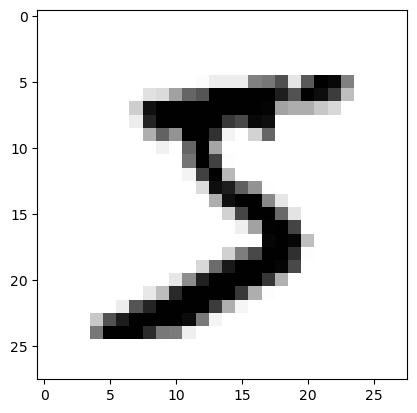

In [74]:
# Selecting an index to display a specific image from the training dataset  
index = 0  

# - plt.imshow() is used to visualize the 28x28 pixel image  
# - cmap=plt.cm.binary ensures the image is displayed in grayscale (black & white)  
plt.imshow(X_train[index], cmap=plt.cm.binary)  

# - y_train[index] contains the digit (0-9) that the image represents  
print(y_train[index])  

#### We can see the second, or other images in the dataset by changing the index
You will see a four appear in lieu of our first number.

---

4


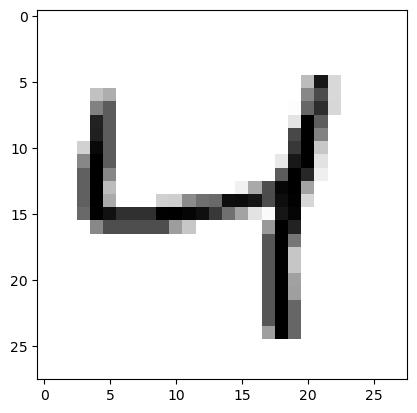

In [80]:
# Selecting an index to display a specific image from the training dataset  
index = 2

# - plt.imshow() is used to visualize the 28x28 pixel image  
# - cmap=plt.cm.binary ensures the image is displayed in grayscale (black & white)  
plt.imshow(X_train[index], cmap=plt.cm.binary)  

# - y_train[index] contains the digit (0-9) that the image represents  
print(y_train[index])  

#### Flattening the images from 28x28 matrices into 1D arrays of 784 pixels 


----

In [89]:
# - Neural networks typically process inputs as 1D vectors rather than 2D images  
# - reshape(len(X_train), 28 * 28) converts each image into a 784-element vector  
X_train_flat = X_train.reshape(len(X_train), (28 * 28))  
X_test_flat = X_test.reshape(len(X_test), (28 * 28))  

In [94]:
# Checking the shape of the flattened training data  
# - After reshaping, each image is now a 1D array of 784 pixel values  
# - The dataset still contains 60,000 images  
X_train_flat.shape  

(60000, 784)

#### Model Overview
This model consists of four layers. The first layer uses the ReLU (Rectified Linear Unit) activation function, which introduces non-linearity by outputting the input directly if it's positive, or zero otherwise.

The next two layers use the sigmoid activation function, which outputs values between 0 and 1—ideal for the already scaled data.

The final layer employs softmax, converting the outputs into a probability distribution for multi-class classification.

The model uses the Adam optimizer, which efficiently updates weights during training, and is well-suited for sparse categorical cross-entropy loss.

---

In [101]:
# Building a Sequential neural network model in Keras
model = keras.Sequential([
    # First Dense layer: 
    # - 128 neurons
    # - Input shape of (784,) corresponds to flattened image (28x28 pixels)
    # - 'ReLU' (Rectified Linear Unit) activation function introduces non-linearity
    keras.layers.Dense(128, input_shape=(784,), activation='relu'),

    # Second Dense layer:
    # - 64 neurons
    # - 'Sigmoid' activation function outputs values between 0 and 1
    keras.layers.Dense(64, activation='sigmoid'),

    # Third Dense layer:
    # - 32 neurons
    # - 'Sigmoid' activation function
    keras.layers.Dense(32, activation='sigmoid'),

    # Output layer:
    # - 10 neurons corresponding to the 10 possible digit classes (0-9)
    # - 'Softmax' activation function gives probabilities for each class (sums to 1)
    keras.layers.Dense(10, activation='softmax'),
])

# Compiling the model:
# - Optimizer: 'Adam' is an efficient gradient descent optimizer
# - Loss function: 'sparse_categorical_crossentropy' used for multi-class classification
# - Metrics: 'accuracy' to track the model's performance during training
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training the model:
# - Using the flattened training data (X_train_flat) and corresponding labels (y_train)
# - Running for 5 epochs to train the model
model.fit(X_train_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 969us/step - accuracy: 0.7994 - loss: 0.8863
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 969us/step - accuracy: 0.9609 - loss: 0.1389
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 928us/step - accuracy: 0.9765 - loss: 0.0837
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 937us/step - accuracy: 0.9832 - loss: 0.0582
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 940us/step - accuracy: 0.9872 - loss: 0.0447


#### Evaluating the Model with Test Data  

While our model achieved high accuracy during training with minimal loss, it's important to test it on unseen data to measure its **real-world performance**. Using the test dataset, we can evaluate how well the model generalizes beyond the training data.  

---

In [107]:
model.evaluate(X_test_flat, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - accuracy: 0.9732 - loss: 0.0959


[0.08164511620998383, 0.9768000245094299]

The output [0.0816, 0.9768] represents the loss (0.0816) and accuracy (97.68%) on the test data. A low loss and high accuracy indicate strong model performance and good generalization to unseen data.

#### Creating a Confusion Matrix to Identify Misclassified Digits - Seaborn

To analyze which digits the model struggles with, we can generate a **confusion matrix**. This helps us identify any patterns in misclassification by comparing actual labels to predicted labels.

---

In [113]:
# Generating predictions for the test dataset
y_pred = model.predict(X_test_flat)

# Converting predicted probability distributions into class labels
# np.argmax(i) selects the index with the highest probability for each prediction
y_pred_labels = [np.argmax(i) for i in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step


This output indicates that the model processed all 313 test batches efficiently, taking an average of 561 microseconds per step. It confirms that predictions were successfully generated

<Axes: >

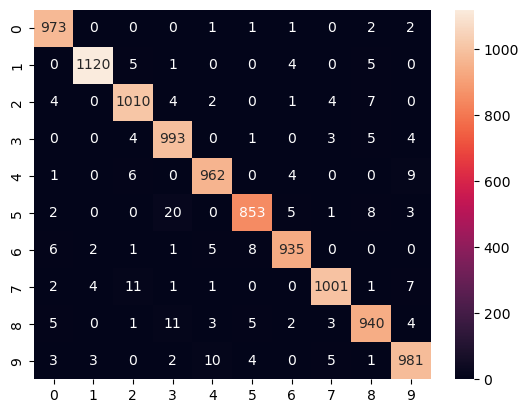

In [119]:
# Creating a confusion matrix to analyze misclassifications
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)

# Visualizing the confusion matrix using a heatmap using Seaborn
# 'annot=True' displays the numbers, and 'fmt="d"' ensures integer formatting
sn.heatmap(confusion_matrix, annot=True, fmt='d')

#### How to Interpret a Confusion Matrix
- Diagonal Values: These are correct predictions. Higher values here indicate the model is accurately predicting those digits.
- Off-Diagonal Values: These show misclassifications. If a digit is frequently predicted as another, it indicates the model struggles with distinguishing those digits.
- Rows: Represent actual values (true labels).
- Columns: Represent predicted values.

By looking at the matrix, you can spot patterns in misclassifications and identify where the model needs improvement.

---